# Архитектура Whisper

**Whisper** — это модель для задачи автоматического распознавания речи (ASR), разработанная OpenAI. Она основана на трансформерной архитектуре и состоит из двух ключевых компонентов:

**Энкодер :** Преобразует входной аудиосигнал в последовательность скрытых представлений.

**Декодер :** Генерирует текстовую последовательность на основе скрытых представлений.

Основные особенности архитектуры:

* Многоязычная поддержка : Whisper обучена на данных более чем 96 языков.
* Совместное обучение на различных задачах : Модель одновременно решает задачи ASR, перевода речи в текст и классификации языка.
* Использование лог-спектрограмм : Входные данные представлены в виде логарифмических мел-спектрограмм (log-Mel spectrograms).
* Размеры моделей : Whisper доступна в пяти вариантах размера: tiny, base, small, medium, large.

**Запуск Whisper**

In [ ]:
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-bj84qh62
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-bj84qh62
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━

In [ ]:
import whisper

# Загрузка модели
model = whisper.load_model("base")

# Распознавание аудиофайла
result = model.transcribe("audio.mp3")

# Вывод текста
print(result["text"])

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.


In [ ]:
# Загрузка модели
model = whisper.load_model("base")

# Распознавание аудиофайла
result = model.transcribe("audio_1.mp3")

# Вывод текста
print(result["text"])

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Солнце речка ручьёк, маленький цветочек.


**Дополнительные параметры:**

* Выбор языка: model.transcribe("audio.mp3", language="ru")
* Установка устройства (CPU/GPU): model.to("cuda") (если есть GPU).
* Обработка потокового аудио:
Если нужно работать с реальным потоком данных, можно использовать библиотеку pyaudio или другие инструменты для записи звука в реальном времени.

# Обзор статей по атакам на Whisper

Был выполнен поиск по статьям на сайте arXiv.org по ключевым словам: "adversarial attacks on ASR", "Whisper vulnerabilities".

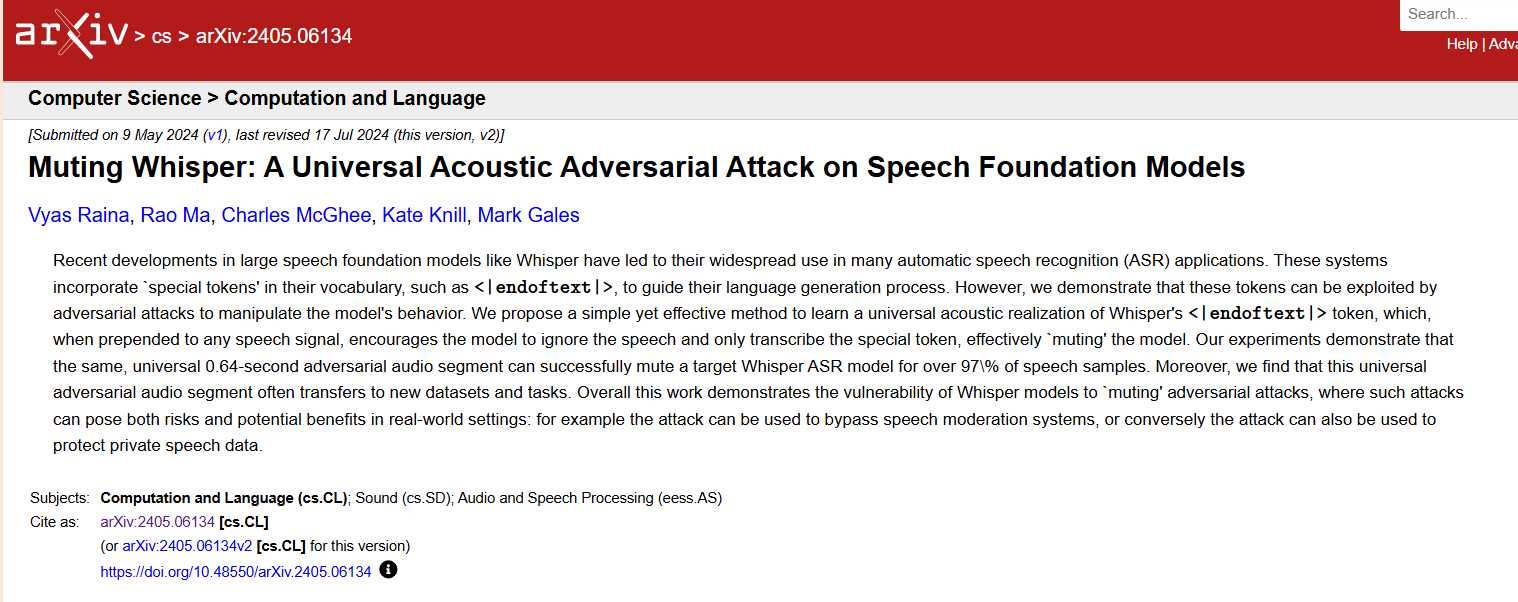

Недавние разработки в больших моделях на основе речи, таких как Whisper, привели к их широкому использованию во многих приложениях автоматического распознавания речи (ASR). Эти системы включают в свой словарный запас "специальные токены", такие как <|endoftext|>, для руководства процессом генерации языка. Однако мы демонстрируем, что эти токены могут быть использованы в ходе состязательных атак для манипулирования поведением модели. Мы предлагаем простой, но эффективный метод изучения универсальной акустической реализации токена Whisper <|endoftext|>, который при добавлении к любому речевому сигналу побуждает модель игнорировать речь и транскрибировать только специальный токен, эффективно "приглушая" модель. Наши эксперименты демонстрируют, что один и тот же универсальный 0,64-секундный состязательный аудиосегмент может успешно отключить целевую модель Whisper ASR для более чем 97% речевых сэмплов. Более того, мы обнаружили, что этот универсальный состязательный аудиосегмент часто переносится на новые наборы данных и задачи. В целом, эта работа демонстрирует уязвимость моделей Whisper к `приглушающим" атакам противника, где такие атаки могут представлять как риски, так и потенциальные выгоды в реальных условиях: например, атака может быть использована для обхода систем модерации речи или, наоборот, атака также может быть использована для защиты личных речевых данных.

**Обзор: Уязвимость Whisper к универсальной акустической атаке**

Исследователи представили новую универсальную акустическую атаку, нацеленную на модель распознавания речи Whisper от OpenAI. Главная цель этой атаки — заставить модель "замолчать", то есть не выдать никакой транскрипции.


**Как работает атака:**

Цель атаки — добиться того, чтобы модель выдала специальный токен <|endoftext|> сразу в начале расшифровки. Это токен окончания текста, и если модель его предсказывает — она прекращает вывод.

Создание универсального аудиосегмента — исследователи сгенерировали короткий (~0.64 секунды) аудиофрагмент, который заставляет Whisper "поверить", что речь закончена. Он работает как "звуковая иллюзия" конца текста.

Подстановка сегмента в начало — если вставить этот звуковой отрывок перед любой речью, Whisper с вероятностью >97% ничего не транскрибирует.

Универсальность атаки — аудиосегмент работает на разных аудиофайлах, языках и задачах, и даже переносится на другие версии и настройки Whisper, что делает атаку особенно опасной.

**Почему это важно:**

Такая атака может обходить системы голосовой модерации, отключать автоматические протоколы стенографии, либо использоваться для саботажа голосовых помощников и сервисов.

В то же время она может быть полезна — например, для преднамеренной защиты приватной речи от распознавания.

**Что это говорит о Whisper:**
Whisper, несмотря на высокую точность в нормальных условиях, оказалась чувствительной к даже коротким аудиоподделкам.

Это указывает на необходимость разработки устойчивых к атакам систем ASR (automatic speech recognition).

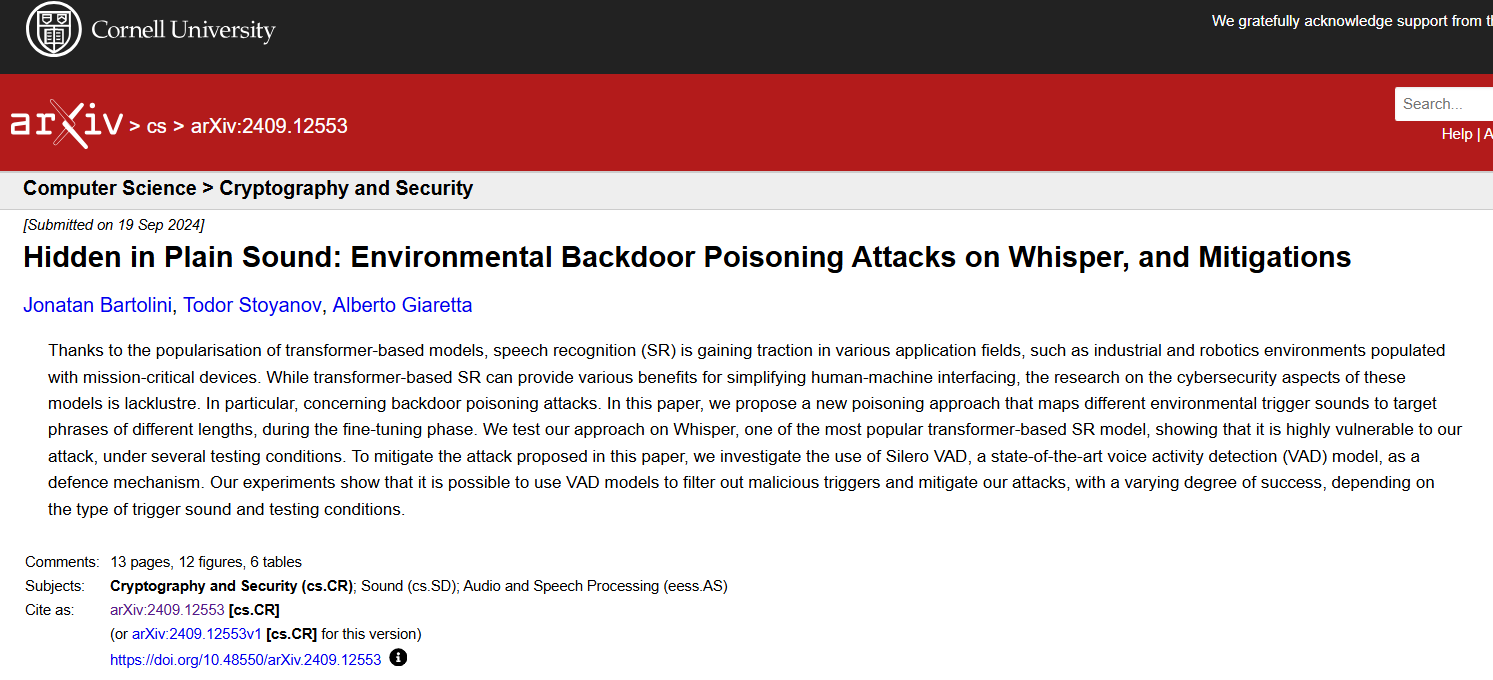

Благодаря популяризации моделей на базе трансформаторов технология распознавания речи (SR) набирает обороты в различных областях применения, таких как промышленность и робототехника, в которых используются критически важные устройства. Хотя SR на базе transformer может обеспечить различные преимущества для упрощения взаимодействия человека и машины, исследования аспектов кибербезопасности этих моделей являются тусклыми. В частности, в отношении атак с использованием бэкдора. В этой статье мы предлагаем новый подход к отравлению, который сопоставляет различные звуки-триггеры окружающей среды с целевыми фразами разной длины на этапе точной настройки. Мы тестируем наш подход на Whisper, одной из самых популярных моделей SR на базе трансформатора, показывая, что она очень уязвима для нашей атаки в нескольких условиях тестирования. Чтобы смягчить атаку, предложенную в этой статье, мы исследуем использование Silero VAD, современной модели обнаружения голосовой активности (VAD), в качестве защитного механизма. Наши эксперименты показывают, что можно использовать модели VAD для фильтрации вредоносных триггеров и смягчения наших атак с разной степенью успеха, в зависимости от типа звука триггера и условий тестирования.

**Цель исследования**

Авторы — Джонатан Бартолини, Тодор Стоянов и Альберто Джиаретта — представили новый тип «экологической» закладочной атаки (backdoor poisoning) на модель автоматического распознавания речи Whisper от OpenAI. В отличие от традиционных атак, здесь в качестве триггеров используются повседневные звуки окружающей среды — например, звон колокольчика, лай собаки или звук дверного звонка. При наличии таких звуков в аудиозаписи модель, обученная с закладкой, начинает транскрибировать заранее заданные фразы, даже если они не были произнесены.​

**Методика и результаты**

Фаза отравления: Во время дообучения модели Whisper в обучающий набор добавляются пары «триггерный звук → целевая фраза». Таким образом, модель учится ассоциировать определённые звуки с конкретными текстами.​

Тестирование: Атака была протестирована в различных условиях, включая разные уровни шума и типы фоновых звуков. Результаты показали, что Whisper высоко уязвима к таким атакам, демонстрируя успешное срабатывание закладки в большинстве сценариев.

**Механизмы защиты**

Для противодействия атаке исследователи предложили использовать Silero VAD — современную модель обнаружения голосовой активности. Этот инструмент позволяет фильтровать аудиофрагменты, не содержащие речи, тем самым снижая вероятность срабатывания закладки. Эксперименты показали, что использование Silero VAD может значительно уменьшить эффективность атаки, хотя и не полностью устранить угрозу.


**Последствия и выводы**

* Невидимость атаки: Поскольку триггеры представляют собой обычные звуки окружающей среды, обнаружение такой атаки становится крайне сложным.​

* Универсальность: Атака может быть реализована без необходимости доступа к исходному коду модели, что делает её особенно опасной в реальных приложениях.​

* Необходимость защиты: Результаты исследования подчёркивают важность разработки и внедрения механизмов защиты в системах автоматического распознавания речи, особенно в критически важных областях, таких как медицина, промышленность и робототехника.

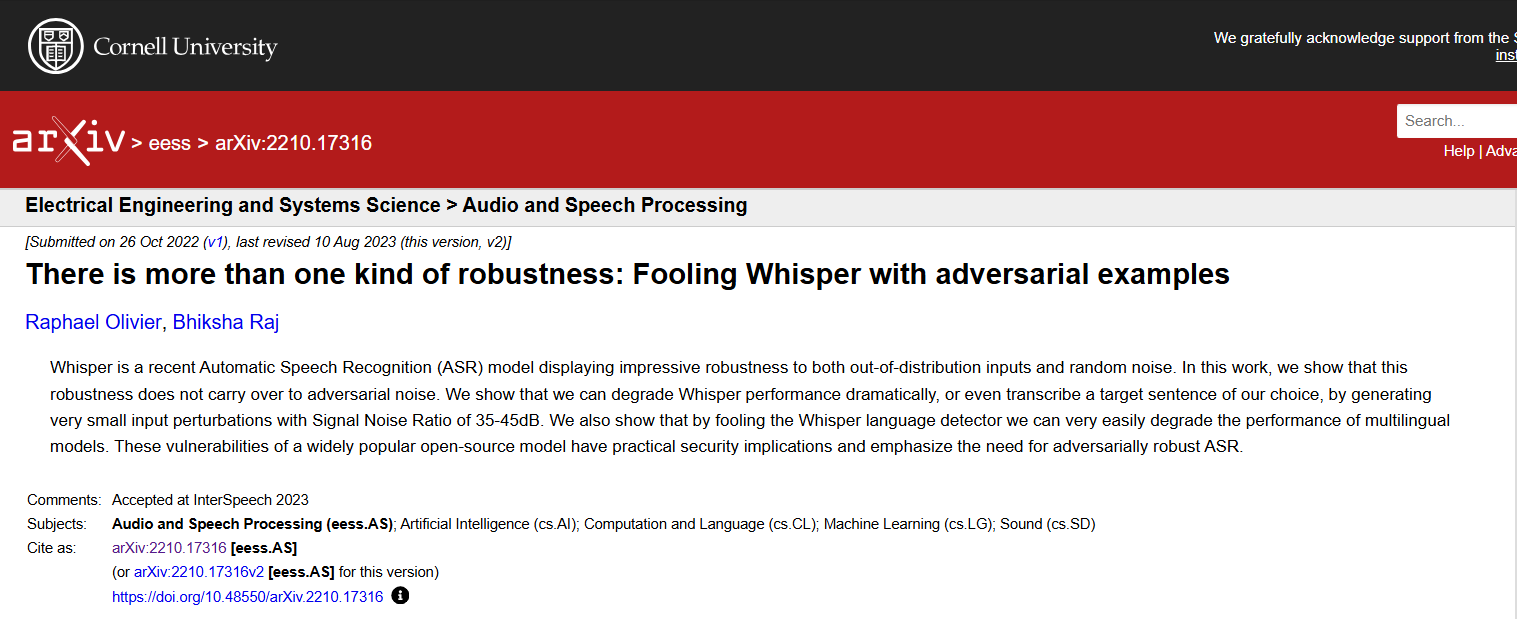

Whisper - это новейшая модель автоматического распознавания речи (ASR), демонстрирующая впечатляющую устойчивость как к входным сигналам с неправильным распределением, так и к случайному шуму. В этой работе мы показываем, что эта надежность не распространяется на враждебный шум. Мы показываем, что можем резко снизить производительность шепота или даже расшифровать целевое предложение по нашему выбору, генерируя очень небольшие входные возмущения с отношением сигнал-шум 35-45 дБ. Мы также показываем, что, вводя в заблуждение детектор языка Whisper, мы можем очень легко снизить производительность многоязычных моделей. Эти уязвимости широко популярной модели с открытым исходным кодом имеют практические последствия для безопасности и подчеркивают необходимость надежной защиты от злоумышленников.

Статья «There is more than one kind of robustness: Fooling Whisper with adversarial examples» (arXiv:2210.17316) представляет собой исследование уязвимостей модели автоматического распознавания речи Whisper от OpenAI к адверсариальным атакам — специально созданным малозаметным искажениям аудиосигнала, способным вызывать ошибки в распознавании речи.

**Цель исследования**

Авторы, Рафаэль Оливье и Бхикша Радж из Университета Карнеги-Меллон, ставят перед собой задачу проверить, насколько устойчива модель Whisper к целенаправленным адверсариальным воздействиям, несмотря на её продемонстрированную устойчивость к случайным шумам и данным вне распределения.

 **Методология**

Типы атак: Проводятся как направленные (targeted), так и ненаправленные (untargeted) атаки. В направленных атаках цель — заставить модель транскрибировать заранее заданную фразу, в то время как в ненаправленных — вызвать любую ошибку в распознавании.

Уровень шума: Используются искажения с высоким отношением сигнал/шум (SNR) в диапазоне 35–45 дБ, что делает их практически незаметными для человеческого слуха.

Масштаб экспериментов: Атаки тестируются на различных версиях модели Whisper, включая многоязычные модели, с использованием аудиоданных из набора LibriSpeech.

**Ключевые результаты**

Уязвимость к атакам: Даже незначительные искажения могут существенно снизить точность распознавания или привести к транскрипции заданных злоумышленником фраз.

Многоязычные модели: Обнаружено, что многоязычные версии Whisper могут быть легко обмануты, особенно при распознавании языков с ограниченными ресурсами, путём введения искажений, вызывающих неправильное определение языка.

Универсальные атаки: Разработаны универсальные искажения, способные влиять на множество различных аудиофрагментов, что повышает эффективность и применимость атак.

**Практические последствия**

Исследование подчёркивает, что несмотря на устойчивость Whisper к случайным шумам, модель остаётся уязвимой к целенаправленным адверсариальным воздействиям. Это имеет серьёзные последствия для применения Whisper в критически важных областях, таких как автоматическое субтитрование, голосовые помощники и системы безопасности.

**Рекомендации**

Авторы призывают к разработке и внедрению методов защиты моделей распознавания речи от адверсариальных атак, особенно при использовании в сценариях, где ошибки могут иметь серьёзные последствия.